Josh Laven

# Problem Set 8



## Question 1 - Decision trees (5 points).
Joe Biden was the 47th Vice President of the United States. He was the subject of many memes, attracted the attention of Leslie Knope (Parks and Recreation, TV sitcom), and experienced a brief surge in attention due to photos from his youth. The data file biden.csv contains a selection of variables from the 2008 American National Election Studies survey that allow you to test competing factors that may influence attitudes towards Joe Biden. The variables are coded as follows:

-biden: feeling thermometer ranging from 0 to 100. Feeling thermometers are a common metric in survey research used to gauge attitudes or feelings of warmth towards individuals and institutions. They range from 0-100, with 0 indicating extreme coldness and 100 indicating extreme warmth.<br>

-female: =1 if respondent is female, =0 if respondent is male <br>

-age: age of respondent in years, range from 18 to 93 <br>

-dem: =1 if respondent is a Democrat, =0 otherwise<br>

-rep: =1 if respondent is a Republican, =0 otherwise<br>

-educ: number of years of formal education completed by respondent, range from 0 to 17 with 17+ representing the first year of grad school and up.

### a) 
Split the data into a training set (70%) and a test set (30%) using the sklearn.model selection.train test split() function with random state=25. Setting the seed will guarantee you all get the same results. Use recursive
binary splitting to fit a decision tree to the training data, with biden
as the response variable and the other variables as predictors. Set the
max depth=3 and min samples leaf=5. Plot the tree and interpret the results. What is the test MSE?

#### Answer
Unsurprisingly, whether a person is a Democrat is the first split in the tree. If the person is not a Democrat, the decision node then splits by whether someone is a Republican. This means that there are independents or other non-affiliated voters who, as a group, have a different opinion of Biden than Republicans. Another interesting thing is that whether someone is a female is used at three of the four decision nodes that determine the terminal nodes. The tree predicts that Democrats above 54.5 years old who are female have the highest warmth for Biden, at a predicted value of 80.289. And the model predicts that people who are neither Democrats nor Republicans and male will have the lowest warmth for Biden, at a predicted value of 56.489.

The test MSE for this decision tree is 396.19

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [2]:
biden_data = pd.read_csv('Biden.csv')

In [3]:
biden_data.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [4]:
X= biden_data[['female','age','educ','dem','rep']]
y= biden_data[['biden']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=25)

In [5]:
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

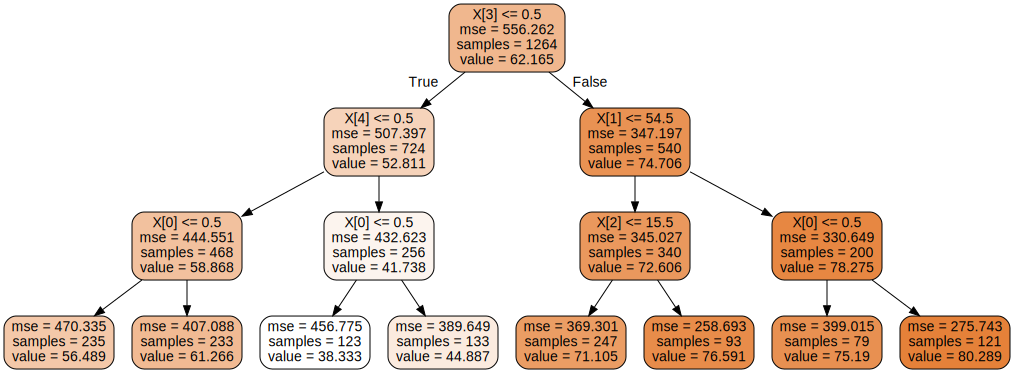

In [6]:
from sklearn.tree import export_graphviz
import graphviz

biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    # feature_names=iris.feature_names[2:],
    # class_names=iris.target_names,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

In [7]:
y_pred = biden_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 396.1937146321307


## b) 
Use sklearn.model selection.RandomizedSearchCV to optimally tune
the hyperparameters in the decision tree from part (a). Tune the parameters max depth, min samples split, and min samples leaf. Set
n iter=100, n jobs=-1, cv=5 for k = 5 k-fold cross validation, random state=25, and scoring=’neg mean squared error’. This last option will allow you
to compare the MSE of the optimized tree (it will output the negative MSE) to the MSE calculated in part (a). Set your parameter distributions over which to test random combinations to the following.

Report your optimal tuning parameter values (use the .best params object of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.

#### Answer
The optimal tuning parameters are: a max depth of 3, a minimum samples leaf of 17, and a minimum samples split of 14 <br>
The test MSE for this model is 392.71

In [8]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_dist1 = {'max_depth': [3, 10],
             'min_samples_split': sp_randint(2, 20),
             'min_samples_leaf': sp_randint(2, 20)}

biden_tree2 = DecisionTreeRegressor()
random_search1 = RandomizedSearchCV(biden_tree2, param_distributions=param_dist1,
                                    n_iter=100, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')

In [9]:
random_search1.fit(X, y)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)

RandBestEstimator1= DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=14, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RandBestParams1= {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
RandBestScore1= 401.6903602232667


In [10]:
#Use optimal parameters
biden_treeopt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=17,min_samples_split=14)
biden_treeopt.fit(X,y)

y_pred_treeopt = biden_treeopt.predict(X_test)
MSE_treeopt = mean_squared_error(y_test, y_pred_treeopt)
print('MSE=', MSE_treeopt)

MSE= 392.7116895977868


### c)
Now tune the parameters of a RandomForest regression model on these data sklearn.ensemble.RandomForestRegressor(). Use
sklearn.model selection.RandomizedSearchCV to optimally tune the hyperparameters in the random forest regression model. Tune the parameters n estimators, max depth, min samples split, min samples leaf, and max features. Set n iter=100, n jobs=-1, cv=5 for k = 5 k-fold cross validation, random state=25, and scoring=’neg mean squared error’. Set your Random Forest parameter distributions over which to test random combinations to the following.
Report your optimal tuning parameter values (use the .best params object of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.

#### Answer
The optimal tuning parameters are: a max depth of 3, a minimum samples leaf of 17, a minimum samples split of 13, an n estimator of 10, and a maximum features of 2. <br>
The test MSE for this model is 440.22

In [12]:
from sklearn.ensemble import RandomForestRegressor

#Create first Random Forest object
biden_rf = RandomForestRegressor(n_estimators=100, max_features=4, bootstrap=True,
                                  n_jobs=-1, oob_score=True, random_state=25)

biden_rf.fit(X,y)


y_pred = biden_rf.oob_prediction_
MSE_rf = mean_squared_error(y, y_pred)
print('MSE=', MSE_rf)

MSE= 533.5736881299662


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [13]:
#Tune hyperparameters
param_dist_tune = {'n_estimators': [10,200],
                   'max_depth': [3, 10],'min_samples_split': sp_randint(2, 20),
                   'min_samples_leaf': sp_randint(2, 20),'max_features':sp_randint(1,5)}

biden_tune = RandomizedSearchCV(biden_rf, param_distributions=param_dist_tune,
                                    n_iter=100, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')


In [14]:
#Get best parameters
biden_tune.fit(X,y)
print('TunedBestEstimator1=', biden_tune.best_estimator_)
print('TunedBestParams1=', biden_tune.best_params_)
print('TunedBestScore1=', -biden_tune.best_score_)

TunedBestEstimator1= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=13, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=True, random_state=25,
           verbose=0, warm_start=False)
TunedBestParams1= {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
TunedBestScore1= 397.0681090117028


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [15]:
#Run new Random Forest with optimal parameters

biden_rf_opt = RandomForestRegressor(n_estimators=10, max_depth=3, min_samples_split=13, min_samples_leaf=17,
                                     max_features=2, bootstrap=True,
                                     n_jobs=-1, oob_score=True, random_state=25)

biden_rf_opt.fit(X,y)


y_pred_rfopt = biden_rf_opt.oob_prediction_
MSE_rfopt = mean_squared_error(y, y_pred_rfopt)
print('MSE=', MSE_rfopt)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


MSE= 440.2238005324634


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


## Question 2 - Classifier “horse” race (5 points). 
For this problem, you will use the 397 observations from the Auto.csvdataset. This dataset includes 397 observations on miles per gallon (mpg), number of cylinders (cylinders), engine displacement (displacement), horsepower (horsepower), vehicle weight (weight), accelera- tion (acceleration), vehicle year (year), vehicle origin (origin), and vehicle name (name). We will study the factors that make miles per gallon high or low. Create a binary variable mpg high that equals 1 if mpg≥ median(mpg) and equals either 0 if mpg< median(mpg).

In [16]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
auto['mpg_high']= np.where(auto.mpg >= np.median(auto['mpg']),1,0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_high
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


### a) 
Use sklearn.linear model.LogisticRegression to fit a logistic model of mpg high on features number of cylinders (cyl), engine displacement (dspl), horsepower (hpwr), vehicle weight (wgt), acceleration (accl), vehicle year (yr), vehicle origin 1 (orgn1), and vehicle origin 2 (orgn2). Make sure to include a constant term. Fit the model using k-fold cross validation with k = 4 folds.

Report the MSE of the model as the average MSE across the k = 4 test sets, and report the error rates for each category of mpg high as the average error rate for that category across the k = 4 test sets.

#### Answer
The average MSE across the 4 tests is 0.0994. The average error rate for mpg_high = 1 is 0.0779, and the average error rate for mpg_high = 0 is 0.1193.

In [18]:
#Convert non-numbers to Nans
auto['horsepower']= pd.to_numeric(auto['horsepower'],errors = 'coerce')
#Drop NaNs
auto = auto.dropna()


In [19]:
auto_log = pd.get_dummies(auto,columns=['origin'])
auto_log = auto_log.drop(['name'], axis=1)

auto_log['const']=1

auto_log.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,mpg_high,origin_1,origin_2,origin_3,const
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0,1


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn import metrics 
from sklearn.metrics import classification_report, mean_squared_error
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier



xvals = auto_log[['const','cylinders','displacement','horsepower',
              'weight','acceleration','year','origin_1','origin_2']].values
yvals = auto_log['mpg_high'].values


In [36]:
kf = KFold(n_splits=4, random_state=25, shuffle=True)
kf.get_n_splits(xvals)

MSE_vec_kf = np.zeros(4)
ones_error = np.zeros(4)
zeros_error= np.zeros(4)
k_ind = int(0)
for train_index, test_index in kf.split(xvals):
    # print("TRAIN:", train_index, "TEST:", test_index)
    # print('k index=', k_ind)
    X_train, X_test = xvals[train_index], xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(max_iter=300)
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    ones_error[k_ind] = 1-((np.sum((y_test==1) & (y_pred==1)))/(np.sum(y_test==1)))
    zeros_error[k_ind] = 1- ((np.sum((y_test==0) & (y_pred==0)))/(np.sum(y_test==0)))
    # print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_logreg_kf = MSE_vec_kf.mean()
print('Test MSE Log Reg and K-fold=', MSE_logreg_kf)
print('Average Error Rate for mpg high = 1: ',ones_error.mean())
print('Average Error Rate for mpg high = 0: ',zeros_error.mean())

Test MSE Log Reg and K-fold= 0.09948979591836735
Average Error Rate for mpg high = 1:  0.07794684205076571
Average Error Rate for mpg high = 0:  0.1193288810332874


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### b) 
Use sklearn.ensemble.RandomForestClassifier to fit a random forest model of mpg high on the eight possible features used in part (a). Use sklearn.model selection.RandomizedSearchCV to optimally tune the hyperparameters in the random forest classification model. Tune the pa- rameters n estimators, max depth, min samples split, min samples leaf, and max features. Set n iter=100, n jobs=-1, cv=4 for k = 4 k-fold cross validation, random state=25, and scoring=’neg mean squared error’. Set your Random Forest parameter distributions over which to test random combinations to the following:
<br>
param_dist3 = {’n_estimators’: [10, 200],
<br>
             ’max_depth’: [3, 8],
              <br>
             ’min_samples_split’: sp_randint(2, 20),
             <br>
             ’min_samples_leaf’: sp_randint(2, 20),
             <br>
             ’max_features’: sp_randint(1, 8)}
<br>                         
Report your optimal tuning parameter values (use the .best params object of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.

#### Answer
The optimal tuning parameters are: a max depth of 3, a minimum samples leaf of 17, a minimum samples split of 14, an n estimator of 10, and a maximum features of 7. <br>
The test MSE for this model is 0.0553


In [23]:
auto_df = auto.drop(['name'], axis=1)

In [24]:
Xvars= auto_df[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']]
yvars= auto_df[['mpg_high']]

In [25]:
#Create training and test data
X_train, X_test, y_train, y_test = train_test_split(Xvars, yvars, test_size=0.4)

In [26]:
#Create first Random Forest object
auto_rf = RandomForestClassifier()
auto_rf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
#Tune hyperparameters
param_rf = {'n_estimators': [10,200],
                   'max_depth': [3, 8],'min_samples_split': sp_randint(2, 20),
                   'min_samples_leaf': sp_randint(2, 20),'max_features':sp_randint(1,8)}

auto_tune = RandomizedSearchCV(auto_rf, param_distributions=param_rf,
                                    n_iter=100, n_jobs=-1, cv=4,
                                   random_state=25,scoring='neg_mean_squared_error')

In [28]:
auto_tune.fit(X_train,y_train)
print('TunedBestEstimator1=', auto_tune.best_estimator_)
print('TunedBestParams1=', auto_tune.best_params_)
print('TunedBestScore1=', -auto_tune.best_score_)

TunedBestEstimator1= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=17, min_samples_split=14,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
TunedBestParams1= {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 17, 'min_samples_split': 14, 'n_estimators': 10}
TunedBestScore1= -0.0


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [35]:
#Run new Random Forest with optimal parameters

auto_rf_opt = RandomForestRegressor(n_estimators=10, max_depth=3, min_samples_split=14, min_samples_leaf=17,
                                     max_features=7, bootstrap=True,
                                     n_jobs=-1, oob_score=True, random_state=25)


auto_rf_opt.fit(X_train,y_train)

y_testpred_rf = auto_rf_opt.predict(X_test)
MSE_randomforest = mean_squared_error(y_test, y_testpred_rf)
print("Test MSE - Random Forest",MSE_randomforest)

Test MSE 0.055321816810514776


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


### c) 
Use sklearn.svm.SVC to fit a support vector machines model of mpg high
with a Gaussian radial basis function kernel kernel=’rbf’ on the eight features used in parts (a) and (b). Use sklearn.model selection.RandomizedSearchCV to optimally tune the hyperparameters in the support vector machines classifier model. Tune the parameters C penalty parameter, gamma kernel coef-
ficient, and shrinking. Set n iter=100, n jobs=-1, cv=4 for k = 4 k-fold cross validation, random state=25, and scoring=’neg mean squared error’. Set your SVM parameter distributions over which to test random combinations to the following:
<br>
param_dist4 = {’C’: sp_uniform(loc=0.2, scale=4.0),
<br>
             ’gamma’: [’scale’, ’auto’],
             <br>
             ’shrinking’: [True, False]}
             <br>
             
Report your optimal tuning parameter values (use the .best params object of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.

#### Answer
The optimal tuning parameters are: a regularization parameter (C) of 1.8094, a gamma that is scaled, and not using shrinking. <br>
The test MSE for this model is 0.0714

In [30]:
from scipy.stats import uniform as sp_uniform
from sklearn import svm

In [31]:
#Create first SVC object
svc_auto = svm.SVC()
svc_auto.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
#Tune hyperparameters
param_svc = {'C': sp_uniform(loc=0.2, scale=4.0),
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False]}

svc_tune = RandomizedSearchCV(svc_auto, param_distributions=param_svc,
                                    n_iter=100, n_jobs=-1, cv=4,
                                   random_state=25,scoring='neg_mean_squared_error')

svc_tune.fit(X_train,y_train)

print('TunedBestEstimator1=', svc_tune.best_estimator_)
print('TunedBestParams1=', svc_tune.best_params_)
print('TunedBestScore1=', -svc_tune.best_score_)

TunedBestEstimator1= SVC(C=1.8094629152568114, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)
TunedBestParams1= {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
TunedBestScore1= 0.09787234042553192


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#Run with optimal parameters

svc_opt = svc_auto = svm.SVC(kernel='rbf', gamma='scale', C=3.23683,shrinking=False)
svc_opt.fit(X_train,y_train)

y_testpred_sv = svc_opt.predict(X_test)
MSE_svm = mean_squared_error(y_test, y_testpred_sv)
print("Test MSE",MSE_svm)


Test MSE 0.07142857142857142


### d) 
Which of the above three models do you think is the best predictor of mpg high? Why?

#### Answer
The random forest from part b has the lowest Test MSE, so there's good reason to believe that model would best predict mpg high given the features from the dataset.

In [49]:
results = pd.DataFrame({'Logistic Regression (a)':MSE_logreg_kf,
                        'Random Forest (b)':MSE_randomforest,
                        'Support Vector Machines (c)':MSE_svm},
                       index=['MSE'])
results

,Logistic Regression (a),Random Forest (b),Support Vector Machines (c)
MSE,0.09949,0.055322,0.071429
